In [1]:
#HR Analytics Project- Understanding the Attrition in HR

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

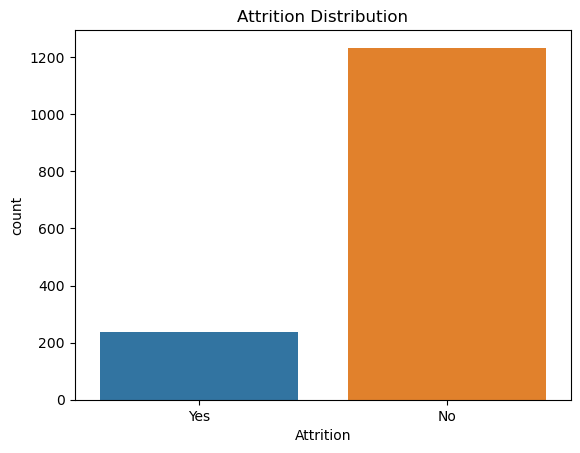

Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
[[254   1]
 [ 35   4]]


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip"
attrition_data = pd.read_csv(url, compression='zip')

# Display the first few rows of the dataset
print(attrition_data.head())

# Exploratory Data Analysis (EDA)
print(attrition_data.info())
print(attrition_data.describe())

# Check for missing values
print(attrition_data.isnull().sum())

# Check the distribution of the target variable 'Attrition'
print(attrition_data['Attrition'].value_counts())

# Visualize the distribution of 'Attrition'
sns.countplot(x='Attrition', data=attrition_data)
plt.title('Attrition Distribution')
plt.show()

# Preprocess the data
# Convert categorical variables to numerical using one-hot encoding
attrition_data = pd.get_dummies(attrition_data, drop_first=True)

# Split the data into features (X) and target variable (y)
X = attrition_data.drop('Attrition_Yes', axis=1)
y = attrition_data['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
